# 1. Can you automate a system that can generate/compute the total number of blue cells in the provided image? Also, how about filtering them by using radius from the center of cell. For instance, let us compute the total number of cells, where the radius is more than 50.

In [20]:
import math
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

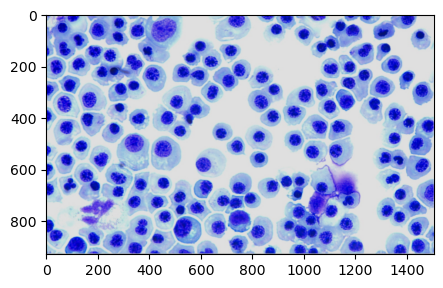

In [21]:
image_arr = np.array(Image.open("RBC-stained.png"))
plt.imshow(image_arr)

In [22]:
image = cv2.cvtColor(image_arr, cv2.COLOR_BGR2GRAY)


ret, threshold = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
kernel = np.ones((3,3), np.uint8)
image_close = cv2.morphologyEx(threshold, cv2.MORPH_CLOSE, kernel)
image_open = cv2.morphologyEx(image_close, cv2.MORPH_OPEN, kernel)

In [23]:
analysis = cv2.connectedComponentsWithStats(threshold, 8, cv2.CV_32S)
(nub_labels, label_matrix, stats, centroids) = analysis

In [24]:
nub_labels

195

In [25]:
output = np.zeros(threshold.shape, dtype="uint8")
for i in range(1, nub_labels):
    area = stats[i, cv2.CC_STAT_AREA]
    radius = math.sqrt(area/3.14)
    if radius > 50:
        componentMask = (label_matrix == i).astype("uint8") * 255
        output = cv2.bitwise_or(output, componentMask)
# Applying connectedComponents function
total_cells, labels = cv2.connectedComponents(output)
print("The total number of cells greater than radius 50 is:", total_cells)

The total number of cells greater than radius 50 is: 4
